# Proficiency Test - Data Science

Name: Alifia Cesarina Harmadi

Data Fellowship Batch 6 by IYKRA

## Question 3.	EDA

### Import Data

In [1]:
#import data
import pandas as pd
import seaborn as sns

df2018 = 'C:/Users/Alifia/Downloads/Crime-Dataset-main/Crime2018.csv'
df2019 = 'C:/Users/Alifia/Downloads/Crime-Dataset-main/Crime2019.csv'
df2020 = 'C:/Users/Alifia/Downloads/Crime-Dataset-main/Crime2020.csv'

#concat data
data2018 = pd.read_csv(df2018, delimiter=',', encoding= 'unicode_escape')
data2019 = pd.read_csv(df2019, delimiter=',', encoding= 'unicode_escape')
data2020 = pd.read_csv(df2020, delimiter=',', encoding= 'unicode_escape')

C:\Users\Alifia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Get Offese Code and Offense Code Group from Crime 2018

In [2]:
CrimeCode = data2018[['OFFENSE_CODE', 'OFFENSE_CODE_GROUP']]
CrimeCode.columns = ['OFFENSE_CODE', 'CODE_GROUP']
CrimeCode = CrimeCode.drop_duplicates()
CrimeCode.head()

,OFFENSE_CODE,CODE_GROUP
0,3115,Investigate Person
1,619,Larceny
2,2629,Harassment
4,3208,Property Lost
6,1107,Fraud


### Concate Data

In [3]:
frames= [data2018,data2019,data2020]
data = pd.concat(frames)
print("Rows: %d and Columns: %d \n" %data.shape)
data.head()

Rows: 189564 and Columns: 17 



,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,4/30/2018 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,3/6/2018 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,10/31/2018 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,4/9/2018 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,1/1/2018 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


### Add Code Group

In [4]:
data_df = pd.merge(data, CrimeCode, on='OFFENSE_CODE', how='left')
data_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,CODE_GROUP
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,4/30/2018 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",Investigate Person
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,3/6/2018 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",Larceny
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,10/31/2018 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",Harassment
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,4/9/2018 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",Harassment
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,1/1/2018 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",Property Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189559,20063425,3114,NaN,INVESTIGATE PROPERTY,A7,21,0,9/1/2020 0:00,2020,9,Tuesday,0,NaN,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)",Investigate Property
189560,20062356,1107,NaN,FRAUD - IMPERSONATION,E18,520,0,8/28/2020 18:39,2020,8,Friday,18,NaN,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)",Fraud
189561,20046400,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,7/2/2020 1:38,2020,7,Thursday,1,NaN,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)",Firearm Violations
189562,20038446,1501,NaN,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,6/3/2020 1:15,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)",Firearm Violations


### Replace values in Offense code group

In [5]:
data_df['OFFENSE_CODE_GROUP'] = data_df['CODE_GROUP']
Crime_df= data_df.drop(['CODE_GROUP'], axis=1)
Crime_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,4/30/2018 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,3/6/2018 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,10/31/2018 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,4/9/2018 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,1/1/2018 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189559,20063425,3114,Investigate Property,INVESTIGATE PROPERTY,A7,21,0,9/1/2020 0:00,2020,9,Tuesday,0,NaN,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
189560,20062356,1107,Fraud,FRAUD - IMPERSONATION,E18,520,0,8/28/2020 18:39,2020,8,Friday,18,NaN,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
189561,20046400,1501,Firearm Violations,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,7/2/2020 1:38,2020,7,Thursday,1,NaN,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
189562,20038446,1501,Firearm Violations,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,6/3/2020 1:15,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"


### Check null values in each column

In [6]:
#check the percentages of null values
Crime_df.isnull().sum() / Crime_df.shape[0] * 100

INCIDENT_NUMBER         0.000000
OFFENSE_CODE            0.000000
OFFENSE_CODE_GROUP      3.184149
OFFENSE_DESCRIPTION     0.000000
DISTRICT                0.547045
REPORTING_AREA          0.000000
SHOOTING               51.953958
OCCURRED_ON_DATE        0.000000
YEAR                    0.000000
MONTH                   0.000000
DAY_OF_WEEK             0.000000
HOUR                    0.000000
UCR_PART               47.844527
STREET                  0.852483
Lat                     3.391467
Long                    3.391467
Location                0.000000
dtype: float64

### Fill missing value in Offense_Code_Group with value in Offense_Description

In [7]:
Crime_df['OFFENSE_CODE_GROUP'] = Crime_df['OFFENSE_CODE_GROUP'].fillna(Crime_df['OFFENSE_DESCRIPTION'])

### Drop missing value in District

In [8]:
Crime_df = Crime_df.dropna(subset=['DISTRICT'])
Crime_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,4/30/2018 9:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,3/6/2018 8:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,10/31/2018 12:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,4/9/2018 8:43,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,1/1/2018 0:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189559,20063425,3114,Investigate Property,INVESTIGATE PROPERTY,A7,21,0,9/1/2020 0:00,2020,9,Tuesday,0,NaN,PARIS ST,42.374427,-71.035279,"(42.3744269722053, -71.0352787630199)"
189560,20062356,1107,Fraud,FRAUD - IMPERSONATION,E18,520,0,8/28/2020 18:39,2020,8,Friday,18,NaN,RIVERSIDE SQ,42.256216,-71.124019,"(42.2562159204022, -71.1240194732902)"
189561,20046400,1501,Firearm Violations,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,0,7/2/2020 1:38,2020,7,Thursday,1,NaN,PASADENA RD,42.305761,-71.083772,"(42.3057609263196, -71.0837715727385)"
189562,20038446,1501,Firearm Violations,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,0,6/3/2020 1:15,2020,6,Wednesday,1,NaN,WASHINGTON ST,42.323808,-71.089150,"(42.3238077563779, -71.0891502345332)"


### Fill missing values in SHOOTING with 0 and replace Y with 1

In [9]:
Crime_df['SHOOTING'] = Crime_df['SHOOTING'].fillna(0)
Crime_df.SHOOTING[Crime_df.SHOOTING == 'Y'] = 1 
Crime_df.SHOOTING.value_counts()

C:\Users\Alifia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alifia\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alifia\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

0    186810
1      1717
Name: SHOOTING, dtype: int64

### Drop column UCR_PART

In [10]:
Crime_df= Crime_df.drop(['UCR_PART','Location'], axis=1)

### Drop missing values in Street, Lat, Long

In [11]:
Crime_df = Crime_df.dropna()

In [12]:
Crime_df.isnull().sum() / Crime_df.shape[0] * 100

INCIDENT_NUMBER        0.0
OFFENSE_CODE           0.0
OFFENSE_CODE_GROUP     0.0
OFFENSE_DESCRIPTION    0.0
DISTRICT               0.0
REPORTING_AREA         0.0
SHOOTING               0.0
OCCURRED_ON_DATE       0.0
YEAR                   0.0
MONTH                  0.0
DAY_OF_WEEK            0.0
HOUR                   0.0
STREET                 0.0
Lat                    0.0
Long                   0.0
dtype: float64

In [13]:
Crime_df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,0,4/30/2018 9:00,2018,4,Monday,9,HAZLETON ST,42.279971,-71.095534
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,0,3/6/2018 8:00,2018,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853
2,I192076660,2629,Harassment,HARASSMENT,E5,662,0,10/31/2018 12:00,2018,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211
3,I192075386,2629,Harassment,HARASSMENT,A1,96,0,4/9/2018 8:43,2018,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,0,1/1/2018 0:00,2018,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838


### Check data types

In [14]:
#check data type
Crime_df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
STREET                  object
Lat                    float64
Long                   float64
dtype: object

### Replace Data Types

In [15]:
#replace into dateime
from datetime import datetime

Crime_df["OCCURRED_ON_DATE"] = pd.to_datetime(Crime_df["OCCURRED_ON_DATE"],errors='coerce')
Crime_df["OFFENSE_CODE"] = Crime_df["OFFENSE_CODE"].astype('str')
Crime_df["SHOOTING"] = Crime_df["SHOOTING"].astype('bool')
print(Crime_df.dtypes)

INCIDENT_NUMBER                object
OFFENSE_CODE                   object
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                         bool
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
STREET                         object
Lat                           float64
Long                          float64
dtype: object


### Create new column called DISTRICT_GROUP

In [16]:
Crime_df["DISTRICT_GROUP"] = Crime_df["DISTRICT"]
Crime_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,DISTRICT_GROUP
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,False,2018-04-30 09:00:00,2018,4,Monday,9,HAZLETON ST,42.279971,-71.095534,B3
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,False,2018-03-06 08:00:00,2018,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853,E18
2,I192076660,2629,Harassment,HARASSMENT,E5,662,False,2018-10-31 12:00:00,2018,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211,E5
3,I192075386,2629,Harassment,HARASSMENT,A1,96,False,2018-04-09 08:43:00,2018,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988,A1
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,False,2018-01-01 00:00:00,2018,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838,D4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189559,20063425,3114,Investigate Property,INVESTIGATE PROPERTY,A7,21,False,2020-09-01 00:00:00,2020,9,Tuesday,0,PARIS ST,42.374427,-71.035279,A7
189560,20062356,1107,Fraud,FRAUD - IMPERSONATION,E18,520,False,2020-08-28 18:39:00,2020,8,Friday,18,RIVERSIDE SQ,42.256216,-71.124019,E18
189561,20046400,1501,Firearm Violations,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,False,2020-07-02 01:38:00,2020,7,Thursday,1,PASADENA RD,42.305761,-71.083772,B2
189562,20038446,1501,Firearm Violations,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,False,2020-06-03 01:15:00,2020,6,Wednesday,1,WASHINGTON ST,42.323808,-71.089150,B2


In [17]:
Crime_df.DISTRICT_GROUP.value_counts()

B2          27742
C11         23828
D4          23083
B3          20920
A1          19126
C6          13861
D14         11899
E18         10629
E13         10423
E5           8501
A7           7533
A15          3996
External      320
Name: DISTRICT_GROUP, dtype: int64

### replace value in DISTRICT_GROUP

In [18]:
#ganti nama kota untuk setelah spliting kolom
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('B2', 'B')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('C11', 'C')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('D4', 'D')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('B3', 'B')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('A1', 'A')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('C6', 'C')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('D14', 'D')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('E18', 'E')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('E13', 'E')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('E5', 'E')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('A7', 'A')
Crime_df["DISTRICT_GROUP"] = Crime_df.DISTRICT_GROUP.str.replace('A15', 'A')

In [19]:
Crime_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,DISTRICT_GROUP
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,False,2018-04-30 09:00:00,2018,4,Monday,9,HAZLETON ST,42.279971,-71.095534,B
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,False,2018-03-06 08:00:00,2018,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853,E
2,I192076660,2629,Harassment,HARASSMENT,E5,662,False,2018-10-31 12:00:00,2018,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211,E
3,I192075386,2629,Harassment,HARASSMENT,A1,96,False,2018-04-09 08:43:00,2018,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988,A
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,False,2018-01-01 00:00:00,2018,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189559,20063425,3114,Investigate Property,INVESTIGATE PROPERTY,A7,21,False,2020-09-01 00:00:00,2020,9,Tuesday,0,PARIS ST,42.374427,-71.035279,A
189560,20062356,1107,Fraud,FRAUD - IMPERSONATION,E18,520,False,2020-08-28 18:39:00,2020,8,Friday,18,RIVERSIDE SQ,42.256216,-71.124019,E
189561,20046400,1501,Firearm Violations,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,330,False,2020-07-02 01:38:00,2020,7,Thursday,1,PASADENA RD,42.305761,-71.083772,B
189562,20038446,1501,Firearm Violations,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TR...,B2,300,False,2020-06-03 01:15:00,2020,6,Wednesday,1,WASHINGTON ST,42.323808,-71.089150,B


In [20]:
#save the cleaned data
#Crime_df.to_csv(r'C:/Users/Alifia/Downloads/cleanedcrime_data.csv', index = False)

## Question 5.	Python

### 1.Sebutkan distrik mana (A/B/C/D/E, tanpa nomor) yang memiliki angka tindak kriminal yang paling tinggi!

In [21]:
High_Crime = Crime_df["DISTRICT"].value_counts().sort_values(ascending=False)
High_Crime.head(1)

B2    27742
Name: DISTRICT, dtype: int64

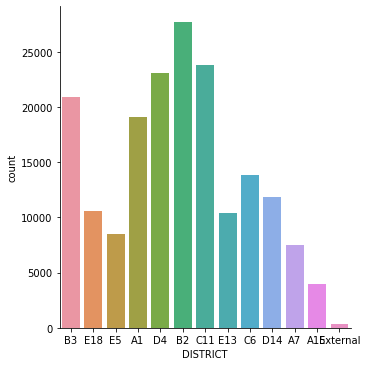

In [22]:
sns.catplot(x="DISTRICT", kind="count", data=Crime_df)

### 2. Sebutkan 3 jenis tindak kriminal yang terjadi pada tahun 2020 namun tidak terjadi di tahun 2019!

In [23]:
crime3_df = Crime_df[['OFFENSE_CODE_GROUP','YEAR']]
crime3_2019 = crime3_df[crime3_df.YEAR == 2019]
crime3_2019

,OFFENSE_CODE_GROUP,YEAR
98888,Warrant Arrests,2019
98889,Fraud,2019
98890,Fraud,2019
98892,Fraud,2019
98893,Auto Theft Recovery,2019
...,...,...
118665,Confidence Games,2019
118666,Verbal Disputes,2019
118667,Violations,2019
118668,Investigate Person,2019


In [24]:
crime3_2019_dist = crime3_2019.drop_duplicates()
crime3_2019_dist

,OFFENSE_CODE_GROUP,YEAR
98888,Warrant Arrests,2019
98889,Fraud,2019
98893,Auto Theft Recovery,2019
98895,Investigate Person,2019
98896,Simple Assault,2019
...,...,...
118582,Migrated Report - Weapons Violation,2019
118585,Migrated Report - Assault/Assault & Battery,2019
118591,Migrated Report - Robbery,2019
118599,Migrated Report - Other Part II,2019


In [25]:
crime3_2020 = crime3_df[crime3_df.YEAR == 2020]
crime3_2020

,OFFENSE_CODE_GROUP,YEAR
118670,Investigate Person,2020
118671,Investigate Person,2020
118672,Confidence Games,2020
118673,Fraud,2020
118674,Criminal Harassment,2020
...,...,...
189559,Investigate Property,2020
189560,Fraud,2020
189561,Firearm Violations,2020
189562,Firearm Violations,2020


In [26]:
crime3_2020_dist = crime3_2020.drop_duplicates()
crime3_2020_dist

,OFFENSE_CODE_GROUP,YEAR
118670,Investigate Person,2020
118672,Confidence Games,2020
118673,Fraud,2020
118674,Criminal Harassment,2020
118678,License Plate Related Incidents,2020
...,...,...
133282,Prostitution,2020
134876,Aircraft,2020
145791,Evidence Tracker Incidents,2020
146670,BREAKING AND ENTERING (B&E) MOTOR VEHICLE,2020


In [27]:
q2df = pd.merge(crime3_2020_dist, crime3_2019_dist, on='OFFENSE_CODE_GROUP', how='left')
q2df[q2df['YEAR_y'].isna()]

,OFFENSE_CODE_GROUP,YEAR_x,YEAR_y
58,Explosives,2020,NaN
59,Phone Call Complaints,2020,NaN
62,Evidence Tracker Incidents,2020,NaN
64,Justifiable Homicide,2020,NaN


### 3. Apakah kelompok tindak kriminal yang paling banyak terjadi pada minggu ke 40-45?

In [28]:
crime_oct = Crime_df[['OFFENSE_CODE_GROUP','MONTH']]
crime_oct = crime_oct[crime_oct.MONTH == 10]
oct_most_crime = crime_oct['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=False)
oct_most_crime.head(1)

Motor Vehicle Accident Response    2555
Name: OFFENSE_CODE_GROUP, dtype: int64

### 4. Sebutkan nama distrik (A/B/C/D/E, tanpa nomor) yang memiliki jumlah tindak kriminal terkecil di akhir pekan!

In [29]:
least_crime_day = Crime_df[['DISTRICT','DAY_OF_WEEK']]
least_crime_day = least_crime_day[least_crime_day.DAY_OF_WEEK != 'Monday']
least_crime_day = least_crime_day[least_crime_day.DAY_OF_WEEK != 'Tuesday']
least_crime_day = least_crime_day[least_crime_day.DAY_OF_WEEK != 'Wednesday']
least_crime_day = least_crime_day[least_crime_day.DAY_OF_WEEK != 'Thursday']
least_crime_day = least_crime_day[least_crime_day.DAY_OF_WEEK != 'Friday']
least_crime_day.head()

,DISTRICT,DAY_OF_WEEK
6,B3,Sunday
18,B3,Saturday
29,B3,Sunday
30,B2,Saturday
37,C11,Saturday


In [30]:
Weekends_Crime = least_crime_day["DISTRICT"].value_counts().sort_values(ascending=True)
Weekends_Crime.head(2)

External     69
A15         893
Name: DISTRICT, dtype: int64

### 5. Sebutkan nama distrik (A/B/C/D/E, tanpa nomor) yang memiliki jumlah tindak kriminal terbanyak di hari kerja!

In [31]:
high_crime_day = Crime_df[['DISTRICT','DAY_OF_WEEK']]
high_crime_day = high_crime_day[high_crime_day.DAY_OF_WEEK != 'Sunday']
high_crime_day = high_crime_day[high_crime_day.DAY_OF_WEEK != 'Saturday']
high_crime_day.head()

,DISTRICT,DAY_OF_WEEK
0,B3,Monday
1,E18,Tuesday
2,E5,Wednesday
3,A1,Monday
4,D4,Monday


In [32]:
Weekday_Crime = high_crime_day["DISTRICT"].value_counts().sort_values(ascending=False)
Weekday_Crime.head(1)

B2    20671
Name: DISTRICT, dtype: int64

## Question 6.	Machine Learning

### Clasification with Information Gain Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [34]:
df = Crime_df.copy()
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,DISTRICT_GROUP
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,False,2018-04-30 09:00:00,2018,4,Monday,9,HAZLETON ST,42.279971,-71.095534,B
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,False,2018-03-06 08:00:00,2018,3,Tuesday,8,HYDE PARK AVE,42.269224,-71.120853,E
2,I192076660,2629,Harassment,HARASSMENT,E5,662,False,2018-10-31 12:00:00,2018,10,Wednesday,12,PRIMROSE ST,42.290765,-71.130211,E
3,I192075386,2629,Harassment,HARASSMENT,A1,96,False,2018-04-09 08:43:00,2018,4,Monday,8,ATLANTIC AVE,42.355264,-71.050988,A
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,False,2018-01-01 00:00:00,2018,1,Monday,0,COMMONWEALTH AVE,42.353522,-71.072838,D


In [35]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()

code_labels = gle.fit_transform(df["OFFENSE_CODE_GROUP"])
code_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
code_mappings

{0: 'Aggravated Assault',
 1: 'Aircraft',
 2: 'Arson',
 3: 'Assembly or Gathering Violations',
 4: 'Auto Theft',
 5: 'Auto Theft Recovery',
 6: 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE',
 7: 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO PROPERTY STOLEN)',
 8: 'Ballistics',
 9: 'Bomb Hoax',
 10: 'Commercial Burglary',
 11: 'Confidence Games',
 12: 'Counterfeiting',
 13: 'Criminal Harassment',
 14: 'Disorderly Conduct',
 15: 'Drug Violation',
 16: 'Embezzlement',
 17: 'Evading Fare',
 18: 'Evidence Tracker Incidents',
 19: 'Explosives',
 20: 'Fire Related Reports',
 21: 'Firearm Discovery',
 22: 'Firearm Violations',
 23: 'Fraud',
 24: 'HOME INVASION',
 25: 'Harassment',
 26: 'Harbor Related Incidents',
 27: 'Homicide',
 28: 'Investigate Person',
 29: 'Investigate Property',
 30: 'Justifiable Homicide',
 31: 'Landlord/Tenant Disputes',
 32: 'Larceny',
 33: 'Larceny From Motor Vehicle',
 34: 'License Plate Related Incidents',
 35: 'License Violation',
 36: 'Liquor Violation',
 37: 'Med

In [36]:
df['CodeLabel'] = code_labels

In [37]:
district_labels = gle.fit_transform(df["DISTRICT"])
district_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
district_mappings

{0: 'A1',
 1: 'A15',
 2: 'A7',
 3: 'B2',
 4: 'B3',
 5: 'C11',
 6: 'C6',
 7: 'D14',
 8: 'D4',
 9: 'E13',
 10: 'E18',
 11: 'E5',
 12: 'External'}

In [38]:
df['DistrictLabel'] = district_labels

In [39]:
day_labels = gle.fit_transform(df["DAY_OF_WEEK"])
day_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
day_mappings

{0: 'Friday',
 1: 'Monday',
 2: 'Saturday',
 3: 'Sunday',
 4: 'Thursday',
 5: 'Tuesday',
 6: 'Wednesday'}

In [40]:
df['DayLabel'] = day_labels

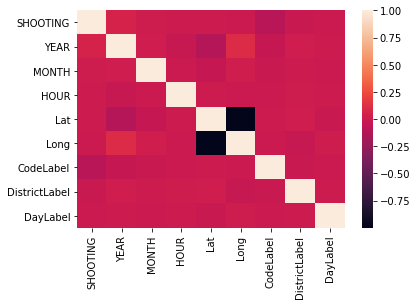

In [41]:
sns.heatmap(df.corr())

In [42]:
features_cols = ["CodeLabel","DistrictLabel","MONTH", "DayLabel"]
X = df[features_cols]
y = df.HOUR

In [43]:
#70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
X_train.head()

,CodeLabel,DistrictLabel,MONTH,DayLabel
56372,76,3,6,1
178172,78,5,2,4
88994,32,3,2,0
162249,76,8,6,1
13458,15,4,11,2


In [45]:
y_train.head()

56372     21
178172    14
88994     19
162249     5
13458     19
Name: HOUR, dtype: int64

In [46]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [47]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0715005773566231


### Investigasi kejahatan vandalism di district D14. Kejahatan tersebut terjadi di minggu lalu pada hari Kamis bulan Juni. Kira-kira jam berapakah kejahatan itu dilakukan?

In [49]:
#create data dictionary with corresponding value from question.
#Vandalism = 76 in CodeLabel
#D14 = 7 in DistrictLabel
#June = 6
#Thursday = 4 in DayLabel

q6b = {'CodeLabel': [76], 'DistrictLabel': [7], 'MONTH':[6],'DayLabel':[4]}
q6b = pd.DataFrame.from_dict(q6b)

In [50]:
#predict the time
y_pred = clf.predict(q6b)
print('Kejahatan kira-kira terjadi pada jam: %.f' % y_pred)

Kejahatan kira-kira terjadi pada jam: 5
